In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
# Dropout -> Prevent Overfitting 
from keras.models import Sequential
from keras.preprocessing import image

## Load Data

In [2]:
train_datagen = image.ImageDataGenerator(
    rescale= 1/255, horizontal_flip= True, zoom_range= 0.2 , shear_range= 0.2
)

train_data = train_datagen.flow_from_directory(directory="D:/DataSets/X ray/chest_xray/train", target_size= (256,256), batch_size= 16,
                                               class_mode = 'binary'
                                               )

Found 5216 images belonging to 2 classes.


In [3]:
# train_datagen = image.ImageDataGenerator(
#     rescale= 1/255, horizontal_flip= True, zoom_range= 0.2 , shear_range= 0.2
# )

# train_data = train_datagen.flow_from_directory(directory="D:/DataSets/X ray/TB Data Set/TBX11K/imgs/train", target_size= (256,256), batch_size= 16,
#                                                class_mode = 'binary'
#                                                )

In [4]:
# train_data.class_indices

In [5]:
train_data.class_indices

{'ABNORMAL': 0, 'NORMAL': 1}

In [6]:
test_datagen = image.ImageDataGenerator(
    rescale= 1/255
)

test_data = test_datagen.flow_from_directory(directory="D:/DataSets/X ray/chest_xray/test", target_size= (256,256), 
                                                batch_size= 16,
                                               class_mode = 'binary'
                                               )

Found 624 images belonging to 2 classes.


In [7]:
# test_datagen = image.ImageDataGenerator(
#     rescale= 1/255
# )

# test_data = test_datagen.flow_from_directory(directory="D:/DataSets/X ray/chest_xray/test", target_size= (256,256), 
#                                                 batch_size= 16,
#                                                class_mode = 'binary'
#                                                )

## CNN Model

In [8]:
model = Sequential()

model.add(Conv2D(filters= 32, kernel_size=(3,3),activation='relu', input_shape = (256,256,3)))

model.add(Conv2D(filters= 64, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters= 64, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters= 128, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters= 128, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units = 64, activation= 'relu'))
model.add(Dropout(rate = 0.50))
model.add(Dense(units=1 , activation='sigmoid'))

model.compile(loss= keras.losses.binary_crossentropy, optimizer= "adam", metrics= ['acc'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

In [10]:
epochs=5
history = model.fit_generator(train_data, steps_per_epoch=8, epochs= epochs, validation_steps= 2,
                   validation_data=test_data
                   )

C:\Users\ushan\AppData\Local\Temp/ipykernel_792/2219439090.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data, steps_per_epoch=8, epochs= epochs, validation_steps= 2,


Epoch 1/5
8/8 [==============================] - 64s 7s/step - loss: 0.7575 - acc: 0.6797 - val_loss: 0.7620 - val_acc: 0.2500
Epoch 2/5
8/8 [==============================] - 42s 5s/step - loss: 0.5865 - acc: 0.7656 - val_loss: 0.7174 - val_acc: 0.4062
Epoch 3/5
8/8 [==============================] - 53s 6s/step - loss: 0.5881 - acc: 0.7266 - val_loss: 0.7873 - val_acc: 0.3750
Epoch 4/5
8/8 [==============================] - 51s 6s/step - loss: 0.5114 - acc: 0.8047 - val_loss: 0.7259 - val_acc: 0.5000
Epoch 5/5
8/8 [==============================] - 39s 5s/step - loss: 0.6458 - acc: 0.7031 - val_loss: 0.7123 - val_acc: 0.4375


##### --------

In [11]:
model.save_weights("model_new.h5")

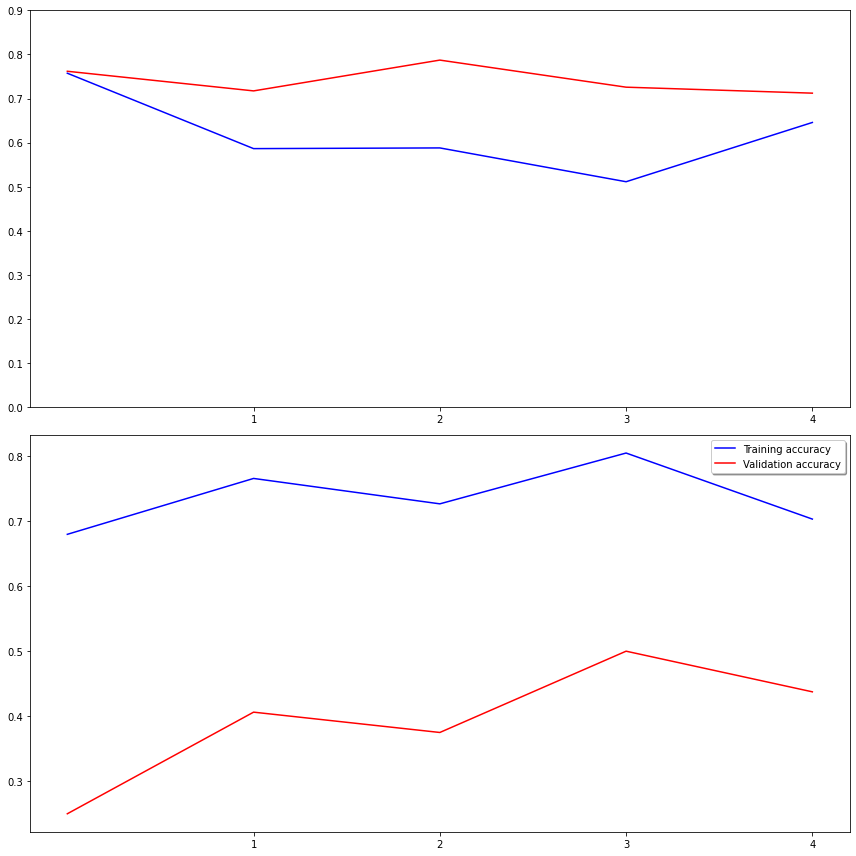

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [13]:
path="D:/DataSets/X ray/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg"
img = image.load_img(path, target_size=(256,256))
# This target size should be equal with previously added in code 

img = image.img_to_array(img)/255
img = np.array([img])
img.shape

(1, 256, 256, 3)

In [14]:
#model.predict_classess(img)

predict_x=model.predict(img) 
classes_x=np.argmax(predict_x,axis=1)

In [15]:
classes_x

array([0], dtype=int64)

In [16]:
def predict_value(path):
    img = image.load_img(path, target_size=(256,256))
    # This target size should be equal with previously added in code 

    img = image.img_to_array(img)/255
    img = np.array([img])
    img.shape

    
    predict_x=model.predict(img) 
    classes_x=np.argmax(predict_x,axis=1)
    
    return classes_x

In [17]:
path_1="D:/DataSets/X ray/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg"
path_2="D:/DataSets/X ray/chest_xray/val/ABNORMAL/person1946_bacteria_4874.jpeg"

predict_value(path_1)

array([0], dtype=int64)

In [18]:
predict_value(path_2)

array([0], dtype=int64)